In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.pipeline import Pipeline  # Note the use of imbalanced-learn's pipeline
from imblearn.over_sampling import SMOTE
import lightgbm as lgb


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Load the HDF5 file into a Pandas dataframe
df = pd.read_csv("QN_TCGA.csv", index_col = 0)

In [ ]:
# Split features and target
X = df.iloc[:, :-1]  # Features
y = df['response']  # Target variable


In [ ]:
#RF = pd.read_csv("rf_selected_features.csv")
#RFE = pd.read_csv("RFE_features_150new.csv")
#boruta = pd.read_csv("boruta_selected_features.csv")
#lda = pd.read_csv("lda_selected_features.csv")
common_98 = pd.read_csv("common_miRNAs_from_feature_sets.csv")

In [ ]:
#RF = RF['0'].tolist()
#RFE = RFE['0'].tolist()
#boruta = boruta['0'].tolist()
#lda = lda['0'].tolist()
common_98 = common_98['x'].tolist()

In [ ]:
#Subset the miRNA matrix based on the miRNA names
#subset_boruta = df[df.columns.intersection(boruta)]
#subset_RFE = df[df.columns.intersection(RFE)]
#subset_RF = df[df.columns.intersection(RF)]
#subset_LDA = df[df.columns.intersection(lda)]
subset_common = df[df.columns.intersection(common_98)]

In [ ]:
#subset_common

In [ ]:
# prompt: take subset of hsa-miR-215-3p, hsa-miR-490-5p, hsa-miR-21-5p, hsa-miR-520e, hsa-miR-449b-5p, hsa-miR-524-5p, hsa-miR-5691, hsa-miR-6499-3p, hsa-miR-488-5p, hsa-miR-30c-2-3p these 10 miRMA from X

#mirna_list = ['hsa-miR-215-3p', 'hsa-miR-490-5p', 'hsa-miR-21-5p', 'hsa-miR-520e',
#              'hsa-miR-449b-5p', 'hsa-miR-524-5p', 'hsa-miR-5691', 'hsa-miR-6499-3p',
#              'hsa-miR-488-5p', 'hsa-miR-30c-2-3p']

mirna_list_RF = ['hsa-miR-21-5p', 'hsa-miR-892c-3p', 'hsa-miR-4778-3p','hsa-miR-215-3p',
                 'hsa-miR-93-5p','hsa-miR-517-5p', 'ksa-let-7c-5p',
                 'hsa-miR-139-5p', 'hsa-miR-6512-5p','hsa-miR-204-5p']

mirna_list_RFE = ['hsa-miR-21-5p', 'hsa-miR-93-5p', 'hsa-miR-892c-3p','hsa-miR-4778-3p', ]

#subset_X = X[X.columns.intersection(mirna_list)]

In [ ]:
# top 10 features from LDA, methods,
# hsa-miR-215-3p, hsa-miR-490-5p, hsa-miR-21-5p, hsa-miR-520e, hsa-miR-449b-5p, hsa-miR-524-5p, hsa-miR-5691, hsa-miR-6499-3p, hsa-miR-488-5p, hsa-miR-30c-2-3p


In [ ]:
#subset_X

In [ ]:
# Split the dataset into training (70%), test (20%), and validation (10%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42, stratify=y_temp)  # 0.125 of 0.8 is 10%

#X_temp, X_test, y_temp, y_test = train_test_split(subset_common, y, test_size=0.2, random_state=42, stratify=y)
#X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.125, random_state=42, stratify=y_temp)  # 0.125 of 0.8 is 10%



In [ ]:
# Assuming 'y' is a pandas Series or a numpy array and 'subset_LDA' is a pandas DataFrame or numpy array
class_to_remove = 'TCGA-ESCA-NT'

# Create a boolean mask for filtering
mask_train = y_train != class_to_remove
mask_val = y_val != class_to_remove
mask_test = y_test != class_to_remove

# Filter the datasets
X_train_filtered = X_train[mask_train]
y_train_filtered = y_train[mask_train]

X_val_filtered = X_val[mask_val]
y_val_filtered = y_val[mask_val]

X_test_filtered = X_test[mask_test]
y_test_filtered = y_test[mask_test]

# Now, X_train_filtered, y_train_filtered, X_val_filtered, y_val_filtered, X_test_filtered, y_test_filtered
# contain the data without the TCGA-ESCA-NT class


In [ ]:
# Define the pipeline with StandardScaler, SMOTE, and LightGBM
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('lightgbm', lgb.LGBMClassifier(random_state=42))
])


In [ ]:
# Initialize Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_results = cross_validate(pipeline, X_train_filtered, y_train_filtered, cv=skf, scoring='accuracy', return_train_score=True, n_jobs=-1, return_estimator=True)


In [ ]:
# Print the cross-validation results
print("Training Accuracy (mean):", np.mean(cv_results['train_score']))
print("Validation Accuracy (mean):", np.mean(cv_results['test_score']))


Training Accuracy (mean): 1.0
Validation Accuracy (mean): 0.9829250671025813


In [ ]:
import joblib
joblib.dump(cv_results, 'lightGBM_model.pkl')

['lightGBM_model.pkl']

In [ ]:
# Fit the model on the full training data
pipeline.fit(X_train_filtered, y_train_filtered)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008071 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 24990
[LightGBM] [Info] Number of data points in the train set: 20682, number of used features: 98
[LightGBM] [Info] Start training from score -3.295837
[LightGBM] [Info] Start training from score -3.295837
[LightGBM] [Info] Start training from score -3.295837
[LightGBM] [Info] Start training from score -3.295837
[LightGBM] [Info] Start training from score -3.295837
[LightGBM] [Info] Start training from score -3.295837
[LightGBM] [Info] Start training from score -3.295837
[LightGBM] [Info] Start training from score -3.295837
[LightGBM] [Info] Start training from score -3.295837
[LightGBM] [Info] Start training from score -3.295837
[LightGBM] [Info] Start training from score -3.295837
[LightGBM] [Info] Start training from score -3.29583

Pipeline(steps=[('scaler', StandardScaler()), ('smote', SMOTE(random_state=42)),
                ('lightgbm', LGBMClassifier(random_state=42))])

In [ ]:
joblib.dump(pipeline, 'lightGBM_pipeline.pkl')

['lightGBM_pipeline.pkl']

In [ ]:
#import joblib

In [ ]:
# load the saved piepline
#pipeline = joblib.load('lightGBM_pipeline.pkl')

In [ ]:
# Combine the filtered validation and test sets
X_combined = pd.concat([X_val_filtered, X_test_filtered], ignore_index=True)
y_combined = pd.concat([y_val_filtered, y_test_filtered], ignore_index=True)


In [ ]:
# Total number of samples across all sets
total_samples = len(X_train_filtered) + len(X_val_filtered) + len(X_test_filtered)

# Number of samples in each set
num_train = len(X_train_filtered)
num_val = len(X_val_filtered)
num_test = len(X_test_filtered)
num_combined = len(X_combined)

# Calculate percentages
percentage_train = (num_train / total_samples) * 100
percentage_val = (num_val / total_samples) * 100
percentage_test = (num_test / total_samples) * 100
percentage_combined = (num_combined / total_samples) * 100

# Display results
print(f"Percentage of samples in training set: {percentage_train:.2f}%")
print(f"Percentage of samples in validation set: {percentage_val:.2f}%")
print(f"Percentage of samples in test set: {percentage_test:.2f}%")
print(f"Percentage of samples in combined validation and test set: {percentage_combined:.2f}%")


Percentage of samples in training set: 69.99%
Percentage of samples in validation set: 10.01%
Percentage of samples in test set: 19.99%
Percentage of samples in combined validation and test set: 30.01%


In [ ]:
num_combined

2134

In [ ]:
y_pred = pipeline.predict(X_combined)

In [ ]:
# Assuming y_test and y_pred are already defined
results_df = pd.DataFrame({
    'y_test': y_combined,
    'y_pred': y_pred
})

# Save to CSV
results_df.to_csv('predictions_lightGBM.csv', index=False)

In [ ]:
#y_pred_val = pipeline.predict(X_val)

In [ ]:
# Assuming y_test and y_pred are already defined
#results_df = pd.DataFrame({
 #   'y_val': y_val,
 #   'y_pred_val': y_pred_val
#})

# Save to CSV
#results_df.to_csv('predictions_lightGBM_val.csv', index=False)

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_combined, y_pred, output_dict=True)
# Save classification report for boruta features to CSV
report_df = pd.DataFrame(report).transpose()
report_df.to_csv('classification_report_lightGBM.csv', index=True)


In [ ]:
#report_val = classification_report(y_val, y_pred_val, output_dict=True)
# Save classification report for boruta features to CSV
#report_df_val = pd.DataFrame(report_val).transpose()
#report_df_val.to_csv('classification_report_lightGBM_val.csv', index=True)


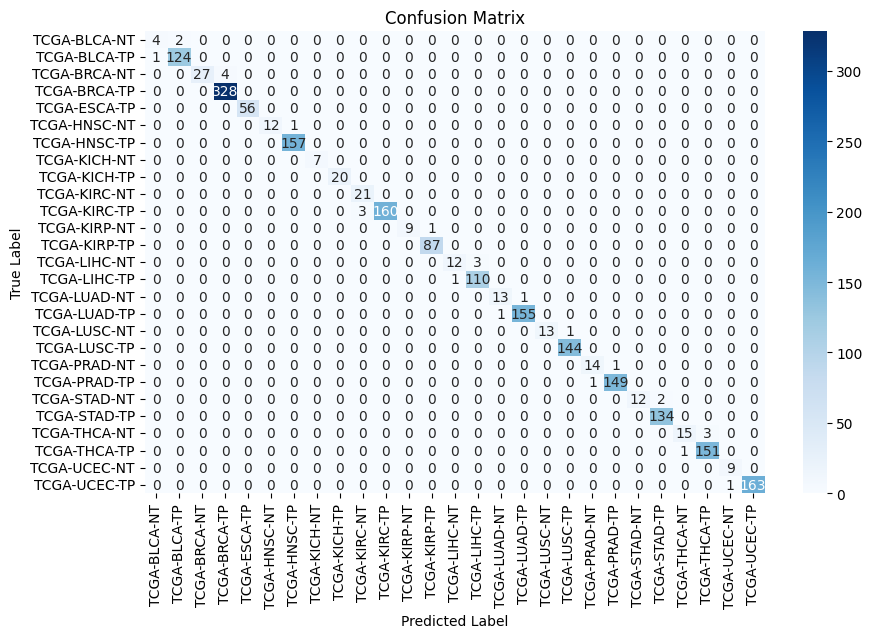

In [ ]:
# prompt: give me confusion matrix plot and the lables take from y_test
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_combined, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_combined), yticklabels=np.unique(y_combined))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('cm_lightGBM.jpeg', dpi=300, format='jpeg', bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
# Confusion Matrix
conf_matrix = confusion_matrix(y_combined, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix, index=np.unique(y_combined), columns=np.unique(y_combined))
conf_matrix_df.to_csv('cm_lightGBM.csv',float_format='%.0f')

In [ ]:
#cm_val = confusion_matrix(y_val, y_pred_val)

#plt.figure(figsize=(10, 6))
#sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues',
         #   xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
#plt.title('Confusion Matrix')
#plt.xlabel('Predicted Label')
#plt.ylabel('True Label')
#plt.savefig('cm_lightGBM_intVal.jpeg', dpi=300, format='jpeg', bbox_inches='tight')
#plt.show()

In [ ]:
y_prob = pipeline.predict_proba(X_combined)  # For ROC curve

In [ ]:
#y_prob_val = pipeline.predict_proba(X_val)  # For ROC curve

In [ ]:
from sklearn.preprocessing import label_binarize
# Assuming you have a mapping from class indices to actual class names
class_names = np.unique(y_combined)  # This gets the actual class names
# Binarize the test labels
y_test_binarized = label_binarize(y_combined, classes=class_names)
joblib.dump(y_test_binarized, 'lightGBM_y_binary.pkl')

joblib.dump(y_prob, 'lightGBM_y_prob.pkl')

['lightGBM_y_prob.pkl']

In [ ]:
# Assuming you have a mapping from class indices to actual class names
#class_names_val = np.unique(y_val)  # This gets the actual class names
# Binarize the test labels
#y_val_binarized = label_binarize(y_val, classes=class_names_val)
#joblib.dump(y_val_binarized, 'lightGBM_y_binary_val.pkl')

#joblib.dump(y_prob_val, 'lightGBM_y_prob_val.pkl')

['lightGBM_y_prob_val.pkl']

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a mapping from class indices to actual class names
class_names = np.unique(y_combined)  # This gets the actual class names

# Binarize the test labels
y_test_binarized = label_binarize(y_combined, classes=class_names)


# Initialize lists to store ROC data
fpr_dict = {}
tpr_dict = {}
roc_auc_dict = {}

# Compute ROC curve and ROC area for each class
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    fpr_dict[class_names[i]] = fpr
    tpr_dict[class_names[i]] = tpr
    roc_auc_dict[class_names[i]] = roc_auc

# Plot ROC curves
plt.figure(figsize=(10, 10))
for class_name in class_names:
    plt.plot(fpr_dict[class_name], tpr_dict[class_name], lw=2, label=f'{class_name} (AUC = {roc_auc_dict[class_name]:0.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')

# Save the ROC plot without the legend
plt.savefig('roc_lightGBM.jpg', dpi=300, format='jpeg', bbox_inches='tight')
plt.close()

# Plot legend in a separate figure
fig, ax = plt.subplots(figsize=(6, 6))

# Plot dummy lines to create a legend
for class_name in class_names:
    ax.plot([], [], lw=2, label=f'{class_name} (AUC = {roc_auc_dict[class_name]:0.2f})')

ax.legend(loc='center', bbox_to_anchor=(0.5, 0.5), fontsize='large')
ax.axis('off')  # Hide axes

# Save the legend plot
plt.savefig('roc_legend_lightGBM.jpg', dpi=300, format='jpeg', bbox_inches='tight')
plt.close()


In [ ]:
# Assuming you have a mapping from class indices to actual class names
class_names = np.unique(y_val)  # This gets the actual class names

# Binarize the test labels
y_test_bin_val = label_binarize(y_val, classes=class_names)


# Initialize lists to store ROC data
fpr_dict = {}
tpr_dict = {}
roc_auc_dict = {}

# Compute ROC curve and ROC area for each class
for i in range(y_test_bin_val.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_bin_val[:, i], y_prob_val[:, i])
    roc_auc = auc(fpr, tpr)
    fpr_dict[class_names[i]] = fpr
    tpr_dict[class_names[i]] = tpr
    roc_auc_dict[class_names[i]] = roc_auc

# Plot ROC curves
plt.figure(figsize=(10, 10))
for class_name in class_names:
    plt.plot(fpr_dict[class_name], tpr_dict[class_name], lw=2, label=f'{class_name} (AUC = {roc_auc_dict[class_name]:0.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass Classification')

# Save the ROC plot without the legend
plt.savefig('roc_lightGBM_intVal.jpg', dpi=300, format='jpeg', bbox_inches='tight')
plt.close()

# Plot legend in a separate figure
fig, ax = plt.subplots(figsize=(6, 6))

# Plot dummy lines to create a legend
for class_name in class_names:
    ax.plot([], [], lw=2, label=f'{class_name} (AUC = {roc_auc_dict[class_name]:0.2f})')

ax.legend(loc='center', bbox_to_anchor=(0.5, 0.5), fontsize='large')
ax.axis('off')  # Hide axes

# Save the legend plot
plt.savefig('rocleg_lightGBM_intVal.jpg', dpi=300, format='jpeg', bbox_inches='tight')
plt.close()

# Convert 180mm to inches (since Matplotlib uses inches)
#width_in_inches = 6  # 1 inch = 25.4 mm

#print("ROC and legend plots saved as 'roc_rf_rf.png' and 'roc_legend_rf_rf.png'.")